# Data Wrangling

In [98]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

In [99]:
df = pd.read_csv('data.csv')

In [100]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [101]:
# Print all columns
for col in df.columns: 
    print(col)

Unnamed: 0
ID
Name
Age
Photo
Nationality
Flag
Overall
Potential
Club
Club Logo
Value
Wage
Special
Preferred Foot
International Reputation
Weak Foot
Skill Moves
Work Rate
Body Type
Real Face
Position
Jersey Number
Joined
Loaned From
Contract Valid Until
Height
Weight
LS
ST
RS
LW
LF
CF
RF
RW
LAM
CAM
RAM
LM
LCM
CM
RCM
RM
LWB
LDM
CDM
RDM
RWB
LB
LCB
CB
RCB
RB
Crossing
Finishing
HeadingAccuracy
ShortPassing
Volleys
Dribbling
Curve
FKAccuracy
LongPassing
BallControl
Acceleration
SprintSpeed
Agility
Reactions
Balance
ShotPower
Jumping
Stamina
Strength
LongShots
Aggression
Interceptions
Positioning
Vision
Penalties
Composure
Marking
StandingTackle
SlidingTackle
GKDiving
GKHandling
GKKicking
GKPositioning
GKReflexes
Release Clause


In [102]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo', 'ID'],axis=1,inplace=True)

In [103]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [104]:
# Check type of predictor feature
print('Name and type of varialbes are: \n')
print(df.dtypes)
print('\nThe number of variables is %d' %len(df.columns))
print('...The number of categorical variables is %d' %(df.shape[1] - sum(df.dtypes=='float64') - sum(df.dtypes=='int64'))) # <- Count object type (Categorical variable) 
print('...The number of continuous variable is %d' %(sum(df.dtypes=='float64') + sum(df.dtypes=='int64'))) # <- Count float type (Continuos variable)

list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

Name and type of varialbes are: 

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 84, dtype: object

The number of variables is 84
...The number of categorical variables is 42
...The number of continuous variable is 42
List of continuous predictor:
['Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDi

## Visualize all missing Data

In [105]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [106]:
draw_missing_data_table(df)

,Total,Percent
Loaned From,16943,0.930576
CDM,2085,0.114516
LM,2085,0.114516
CB,2085,0.114516
LCB,2085,0.114516
...,...,...
Special,0,0.000000
Potential,0,0.000000
Value,0,0.000000
Wage,0,0.000000


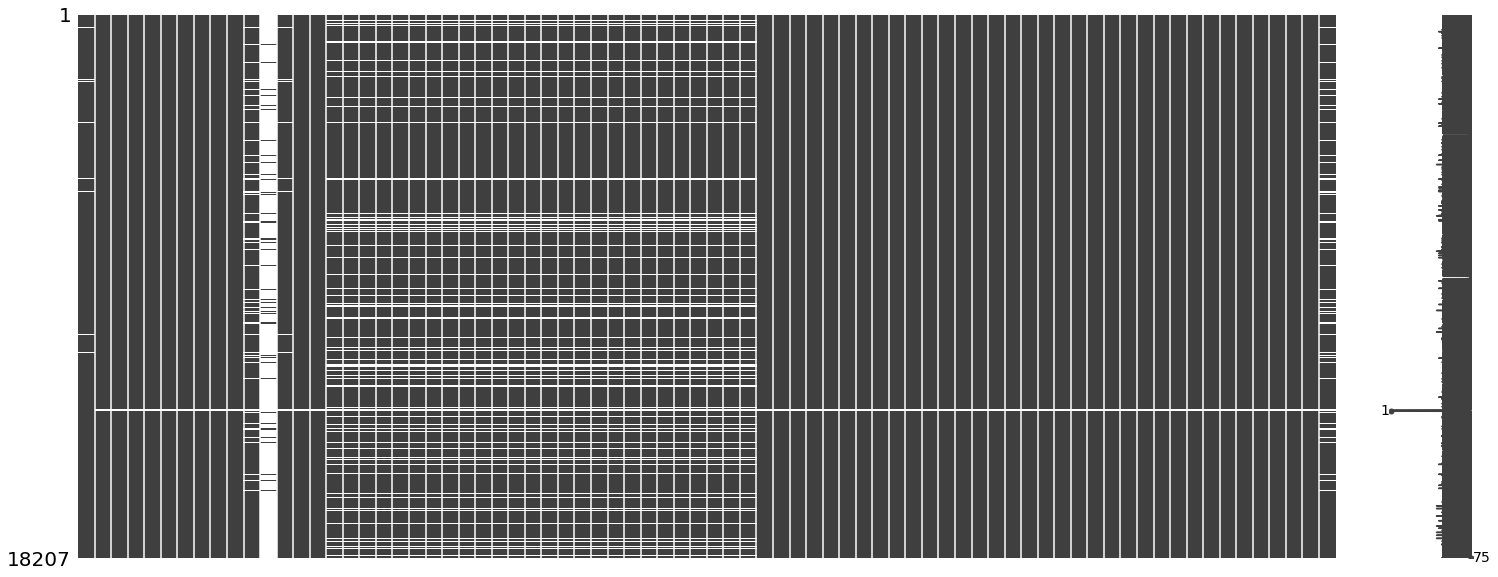

In [46]:
missingdata_df = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingdata_df])

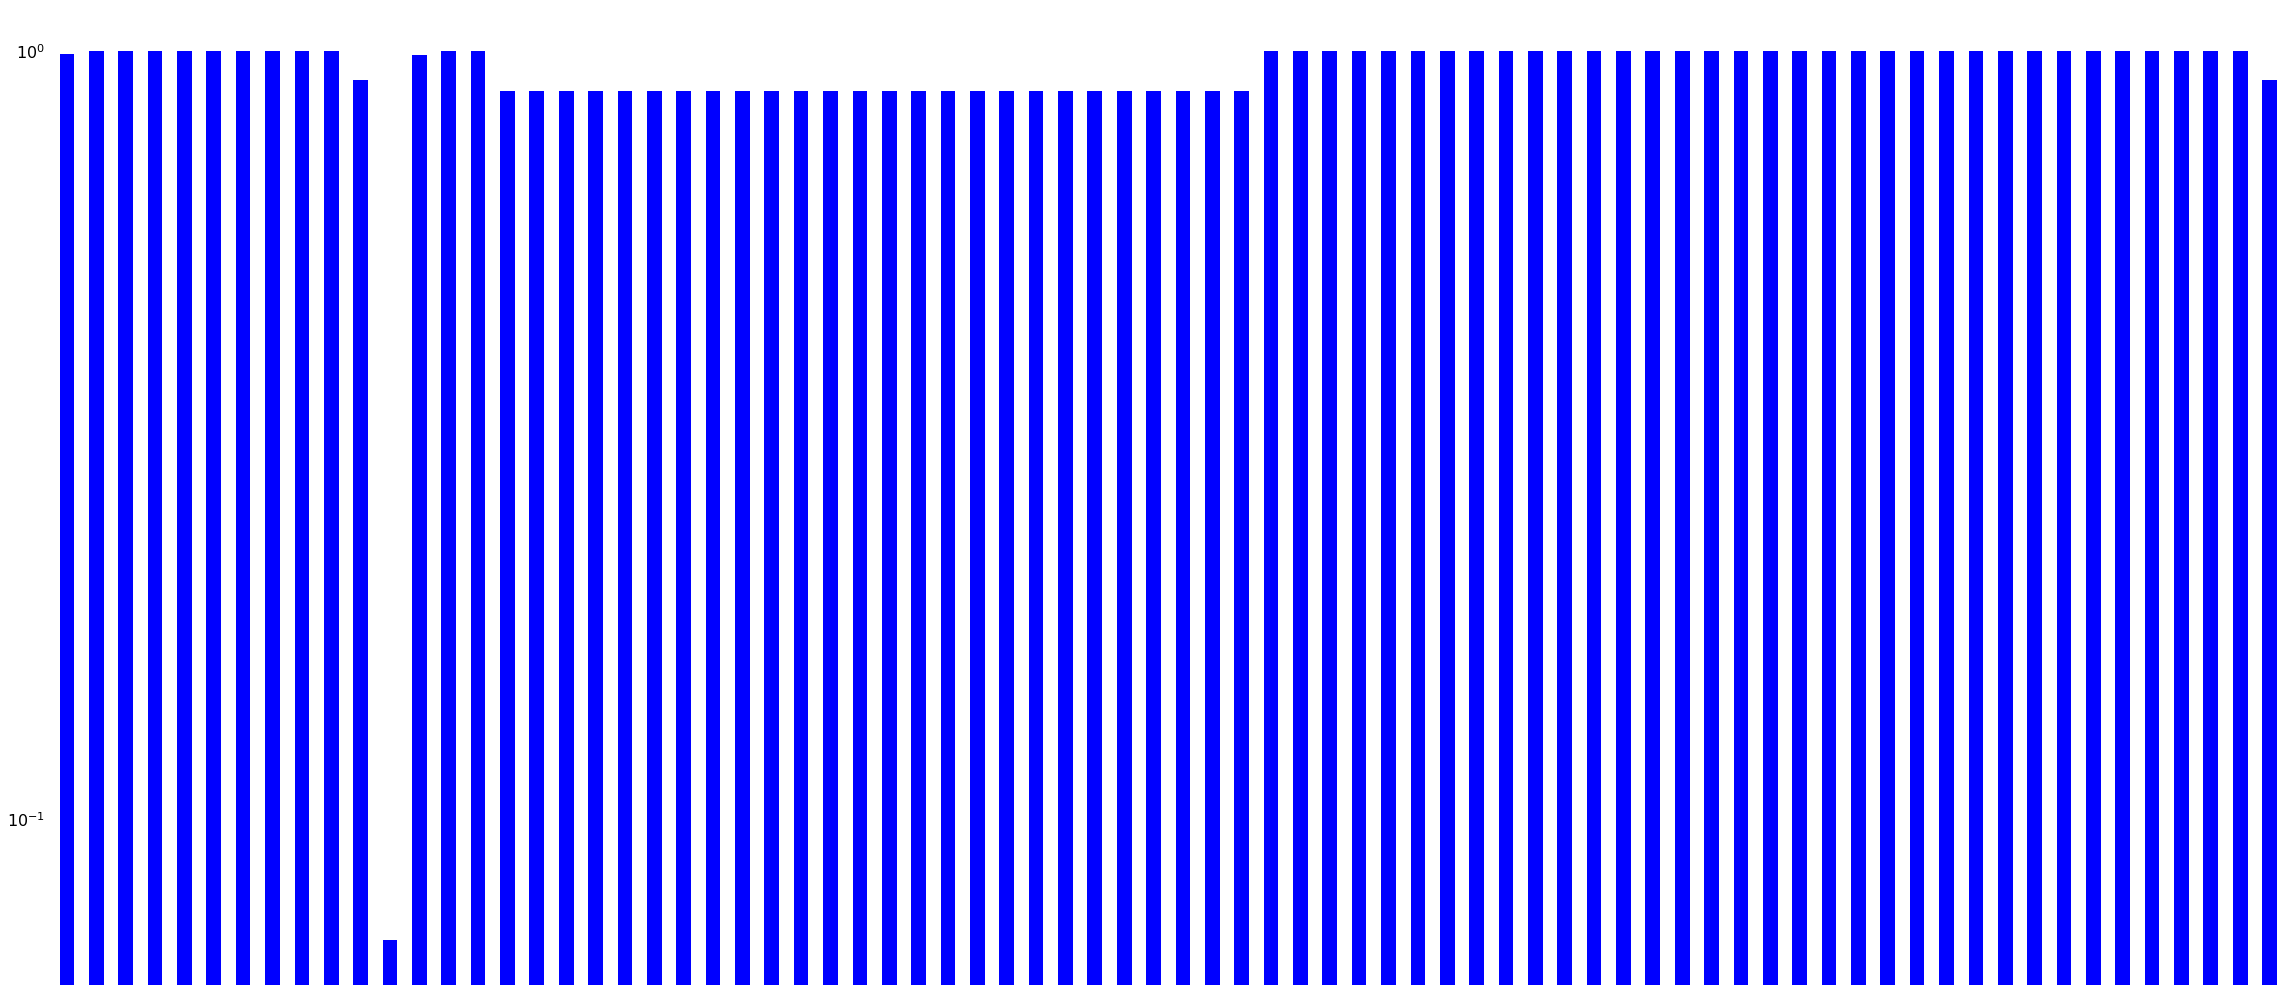

In [47]:
msno.bar(df[missingdata_df], color="blue", log=True, figsize=(40,18))

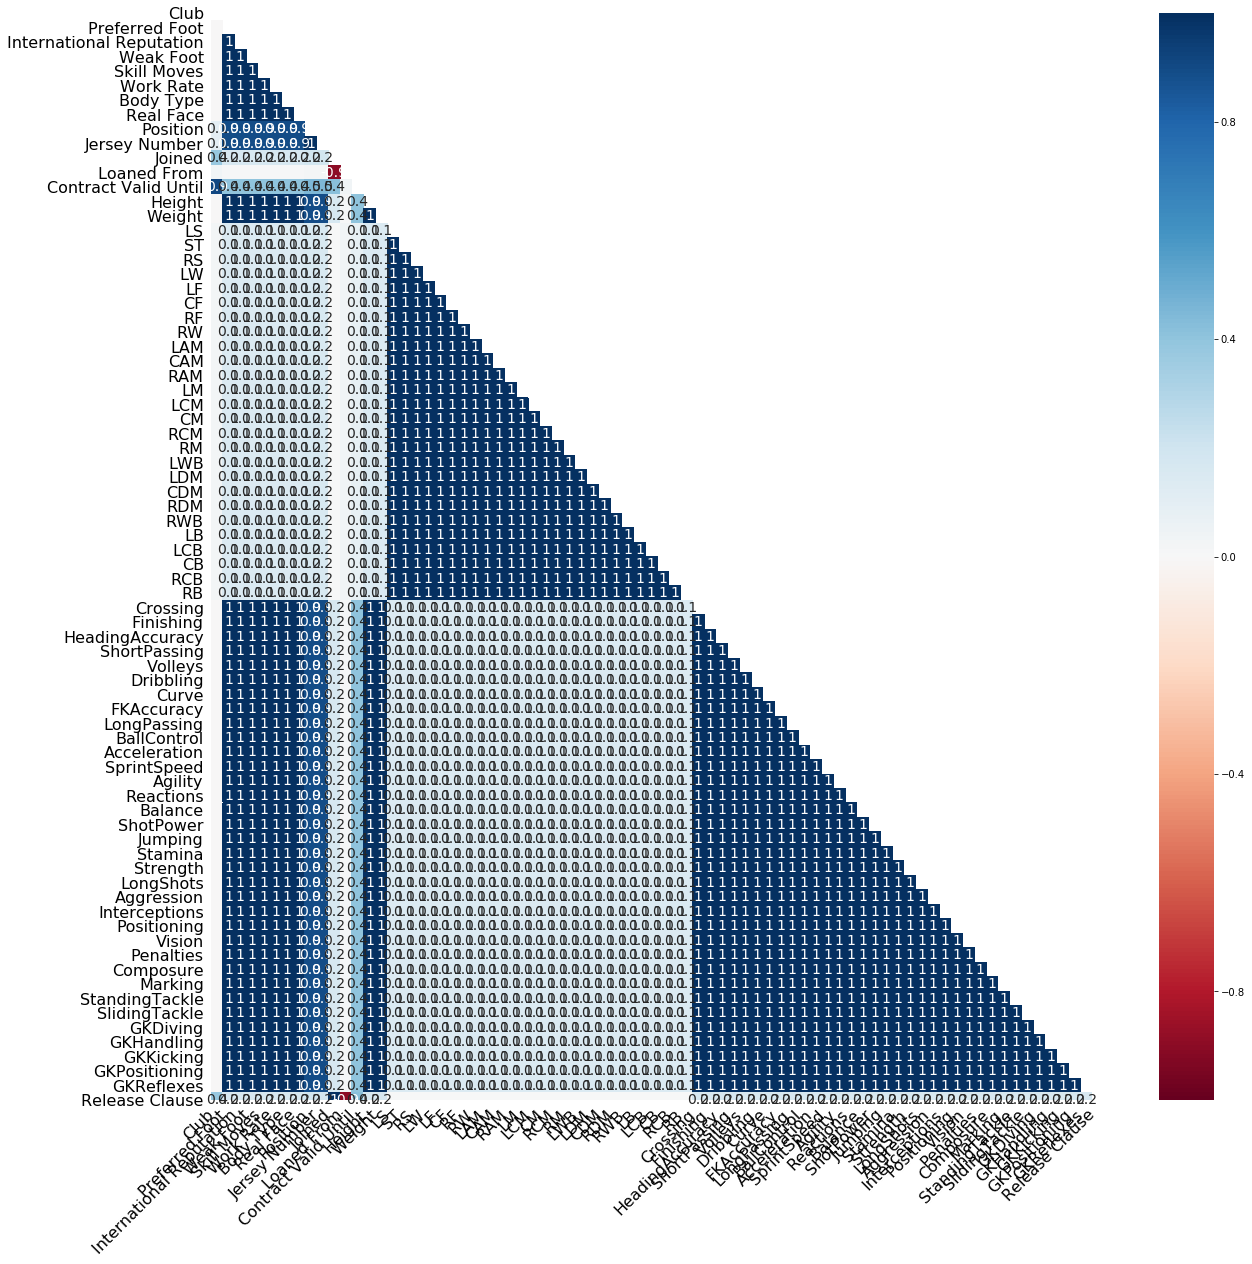

In [34]:
msno.heatmap(df[missingdata_df], figsize=(20,20))

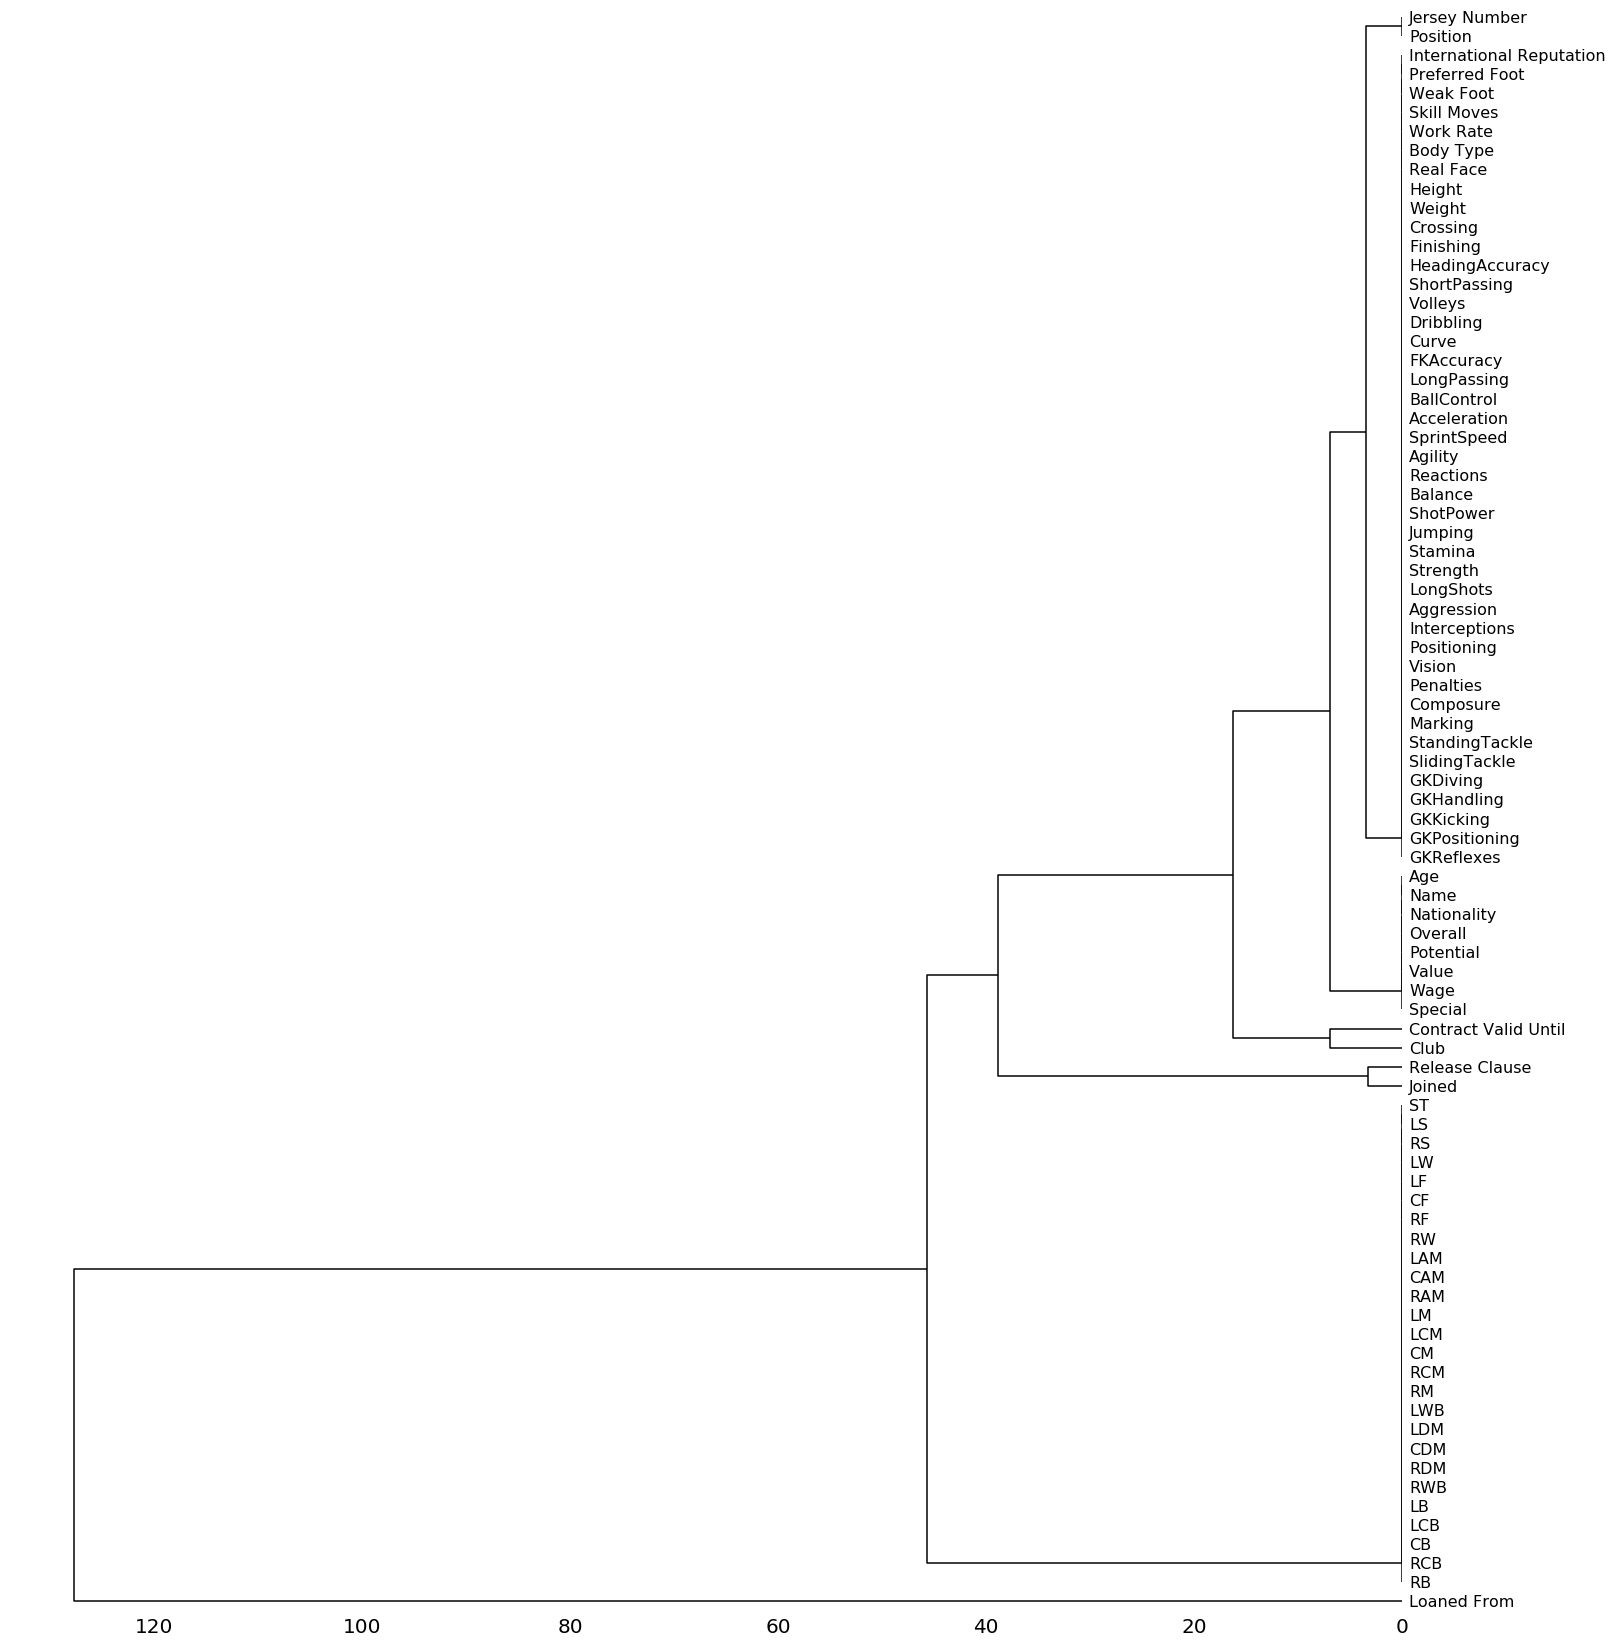

In [35]:
msno.dendrogram(df)

## Imputation attempt 

In [107]:
# These are specific positions that are played in Fifa, 0 for NaN because player does not play them

z_impute=['LWB', 'LCM', 'RS', 'LW','CF','RF','RW','LAM','CAM','RAM','LM','CM','LS','RCM','RM','LF',
             'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','ST']
for cols in z_impute:
    df[cols]=df[cols].fillna(0)

In [108]:
df['Loaned From'].fillna('None', inplace=True)

In [109]:
#imputing numerical features with mean value
numerical_cols=['Jersey Number', 'ShotPower', 'Aggression', 'LongShots', 'Strength', 'Stamina', 'Jumping',
         'Balance', 'Reactions', 'Interceptions', 'SprintSpeed', 'Acceleration', 'BallControl', 'Agility',
         'Vision', 'Positioning', 'FKAccuracy', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
         'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','LongPassing','Volleys','Curve','ShortPassing',
          'HeadingAccuracy','Finishing','Crossing','Skill Moves','Weak Foot', 'International Reputation','Dribbling']

# fill missing values with mean column values
df[numerical_cols].fillna(df[numerical_cols].mean(), inplace=True)

In [110]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [111]:
categories = ['Release Clause','Joined','Contract Valid Until', 'Club', 'Position', 'Weight', 'Height', 'Real Face', 'Body Type', 'Work Rate','Preferred Foot']

In [112]:
df[categories].fillna(df[categories].mode(), inplace=True)

In [115]:
draw_missing_data_table(df)

,Total,Percent
Jersey Number,60,0.003295
Dribbling,48,0.002636
Curve,48,0.002636
Reactions,48,0.002636
Agility,48,0.002636
...,...,...
RW,0,0.000000
RF,0,0.000000
CF,0,0.000000
LF,0,0.000000
